In [ ]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import sklearn
import tensorflow
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.models import Sequential

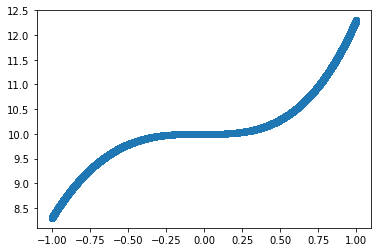

In [ ]:
x = np.linspace(-1, 1, 30000)
y = 0.2*x**4 + 2*x**3 + 0.1*x**2 + 10
plt.scatter(x, y)
plt.show()

In [ ]:
df = pd.DataFrame({'x': x, 'y': y})
print(df.head())

          x         y
0 -1.000000  8.300000
1 -0.999933  8.300333
2 -0.999867  8.300667
3 -0.999800  8.301000
4 -0.999733  8.301333


In [ ]:
def shuffler (argument):
  x = np.linspace(-1, 1, 30000)
  y = 0.2*x**4 + 2*x**3 + 0.1*x**2 + 10
  df = pd.DataFrame({'x': x, 'y': y})
  if argument == 'shuffle':
    dfs = sklearn.utils.shuffle(df)
    return dfs
  if argument != 'shuffle':
    return df

In [ ]:
argument='shuffle'
dfr= shuffler(argument)

In [ ]:
print(dfr['x'])

12957   -0.136171
13023   -0.131771
7305    -0.512984
15890    0.059369
8192    -0.453848
           ...   
24817    0.654522
28972    0.931531
22117    0.474516
13387   -0.107504
40      -0.997333
Name: x, Length: 30000, dtype: float64


In [ ]:
print(dfr['y'])

12957     9.996873
13023     9.997221
7305      9.770179
15890    10.000773
8192      9.842117
           ...    
24817    10.640338
28972    11.854045
22117    10.246345
13387     9.998698
40        8.313300
Name: y, Length: 30000, dtype: float64


In [ ]:
def trainvaltestsplit(x, y, trainratio, valratio, testratio):
    trainx, testx, trainy, testy = train_test_split(x, y, test_size=(1 - trainratio), random_state=42)
    trainx, valx, trainy, valy = train_test_split(trainx, trainy, test_size= (testratio / (valratio + testratio)), random_state=42)
    return (trainx, trainy, testx, testy, valx, valy)

In [ ]:
x_traintest, y_traintest, x_testtest, y_testtest, x_valtest, y_valtest = trainvaltestsplitfunctionattempt(dfrand['x'], dfrand['y'], 0.3, 0.2, 0.5)
print(x_traintest.shape)
print(y_traintest.shape)
print(x_testtest.shape)
print(y_testtest.shape)
print(x_valtest.shape)
print(y_valtest.shape)

In [ ]:
def scaledata(d):
  scaler01 = preprocessing.MinMaxScaler()
  dscaled = pd.DataFrame(scaler01.fit_transform(d), columns = d.columns) #convert dataset to scaled/standardized data set seperated by columns
  return dscaled

In [ ]:
def errorscorecalc(y, ypred):
  import math
  mae = mean_absolute_error(y, ypred)
  mse = mean_squared_error(y, ypred)
  rmse = math.sqrt(mse)
  r2score = r2_score(y, ypred)
  return (mae, mse, rmse, r2score)

In [ ]:
def model3Lrelu():
    model = tensorflow.keras.Sequential()
    model.add(Dense(units = 12, activation = 'relu',input_shape =(len(x_train1), 1)))
    model.add(Dense(units= 8, activation= 'relu'))
    model.add(Dense(units = 4, activation = 'relu'))
    model.add(Dense(units = 1))
    model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse'])
    return model

In [ ]:
def model3Ltanh():
    model = tensorflow.keras.Sequential()
    model.add(Dense(units = 12, activation = 'tanh',input_shape =(len(x_train1), 1)))
    model.add(Dense(units= 8, activation= 'tanh'))
    model.add(Dense(units = 4, activation = 'tanh'))
    model.add(Dense(units = 1))
    model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse'])
    return model

In [ ]:
def model1Lrelu():
    model = tensorflow.keras.Sequential()
    model.add(Dense(units = 24, activation = 'relu',input_shape =(len(x_train1), 1)))
    model.add(Dense(units = 1))
    model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse'])
    return model

In [ ]:
def model1Ltanh():
    model = tensorflow.keras.Sequential()
    model.add(Dense(units = 24, activation = 'tanh',input_shape =(len(x_train1), 1)))
    model.add(Dense(units = 1))
    model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse'])
    return model

Epoch 1/20
215/215 [==============================] - 2s 5ms/step - loss: 67.6448 - mse: 67.6448 - val_loss: 10.3223 - val_mse: 10.3223
Epoch 2/20
215/215 [==============================] - 1s 4ms/step - loss: 1.8203 - mse: 1.8203 - val_loss: 0.6762 - val_mse: 0.6762
Epoch 3/20
215/215 [==============================] - 1s 4ms/step - loss: 0.3966 - mse: 0.3966 - val_loss: 0.2745 - val_mse: 0.2745
Epoch 4/20
215/215 [==============================] - 1s 3ms/step - loss: 0.1871 - mse: 0.1871 - val_loss: 0.1541 - val_mse: 0.1541
Epoch 5/20
215/215 [==============================] - 1s 3ms/step - loss: 0.1110 - mse: 0.1110 - val_loss: 0.0958 - val_mse: 0.0958
Epoch 6/20
215/215 [==============================] - 1s 3ms/step - loss: 0.0696 - mse: 0.0696 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 7/20
215/215 [==============================] - 1s 3ms/step - loss: 0.0445 - mse: 0.0445 - val_loss: 0.0393 - val_mse: 0.0393
Epoch 8/20
215/215 [==============================] - 1s 3ms/step - loss

(0.030913395221649032,
 0.0016150897278935095,
 0.04018817895716985,
 0.9972180191738207)

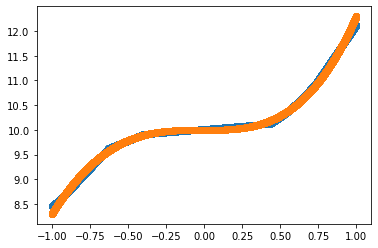

In [ ]:
dfc1 = shuffler('shuffle')
x_train1, y_train1, x_test1, y_test1, x_val1, y_val1 = trainvaltestsplit(dfc1['x'], dfc1['y'], 0.3, 0.2, 0.5)
c1 = model3Lrelu()
c1.fit(x_train1, y_train1, epochs = 20, batch_size = 12, validation_data = (x_val1, y_val1), shuffle = False)
predictioncase1 = c1.predict(np.array(x_test1))
plt.scatter(x_test1, predictioncase1)
plt.scatter(x_test1, y_test1)
errorscorecalc(y_test1, predictioncase1)

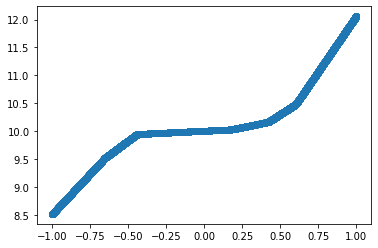

In [ ]:
plt.scatter(x_test1, predictioncase1)

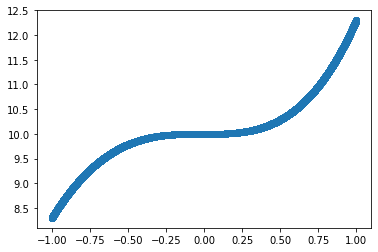

In [ ]:
plt.scatter(x_test1, y_test1)

Epoch 1/20
215/215 [==============================] - 2s 5ms/step - loss: 83.5597 - mse: 83.5597 - val_loss: 60.8081 - val_mse: 60.8081
Epoch 2/20
215/215 [==============================] - 1s 4ms/step - loss: 36.5264 - mse: 36.5264 - val_loss: 14.8954 - val_mse: 14.8954
Epoch 3/20
215/215 [==============================] - 1s 3ms/step - loss: 5.4568 - mse: 5.4568 - val_loss: 0.7447 - val_mse: 0.7447
Epoch 4/20
215/215 [==============================] - 1s 3ms/step - loss: 0.2214 - mse: 0.2214 - val_loss: 0.0801 - val_mse: 0.0801
Epoch 5/20
215/215 [==============================] - 1s 4ms/step - loss: 0.0679 - mse: 0.0679 - val_loss: 0.0699 - val_mse: 0.0699
Epoch 6/20
215/215 [==============================] - 1s 4ms/step - loss: 0.0613 - mse: 0.0613 - val_loss: 0.0633 - val_mse: 0.0633
Epoch 7/20
215/215 [==============================] - 1s 4ms/step - loss: 0.0557 - mse: 0.0557 - val_loss: 0.0573 - val_mse: 0.0573
Epoch 8/20
215/215 [==============================] - 1s 4ms/step - 

(0.1250704085164354,
 0.028630990830859234,
 0.16920694675709752,
 0.9506833173721856)

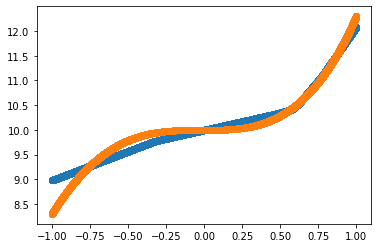

In [ ]:
dfc2 = shuffler('shuffle')
x_train2, y_train2, x_test2, y_test2, x_val2, y_val2 = trainvaltestsplit(dfc1['x'], dfc1['y'], 0.3, 0.2, 0.5)
c2 = model1Lrelu()
c2.fit(x_train2, y_train2, epochs = 20, batch_size = 12, validation_data = (x_val2, y_val2), shuffle=False)
predictioncase2 = c2.predict(np.array(x_test2))
plt.scatter(x_test2, predictioncase2)
plt.scatter(x_test2, y_test2)
errorscorecalc(y_test2, predictioncase2)

Epoch 1/20
215/215 [==============================] - 2s 5ms/step - loss: 68.6419 - mse: 68.6419 - val_loss: 33.9876 - val_mse: 33.9876
Epoch 2/20
215/215 [==============================] - 1s 4ms/step - loss: 25.4581 - mse: 25.4581 - val_loss: 19.3841 - val_mse: 19.3841
Epoch 3/20
215/215 [==============================] - 1s 4ms/step - loss: 15.4845 - mse: 15.4845 - val_loss: 12.0582 - val_mse: 12.0582
Epoch 4/20
215/215 [==============================] - 1s 5ms/step - loss: 9.5732 - mse: 9.5732 - val_loss: 7.3630 - val_mse: 7.3630
Epoch 5/20
215/215 [==============================] - 1s 4ms/step - loss: 5.7776 - mse: 5.7776 - val_loss: 4.3782 - val_mse: 4.3782
Epoch 6/20
215/215 [==============================] - 1s 4ms/step - loss: 3.4114 - mse: 3.4114 - val_loss: 2.5689 - val_mse: 2.5689
Epoch 7/20
215/215 [==============================] - 1s 5ms/step - loss: 2.0175 - mse: 2.0175 - val_loss: 1.5436 - val_mse: 1.5436
Epoch 8/20
215/215 [==============================] - 1s 5ms/ste

(0.26298719545602106,
 0.1596873622581641,
 0.3996090117329239,
 0.7192909573753602)

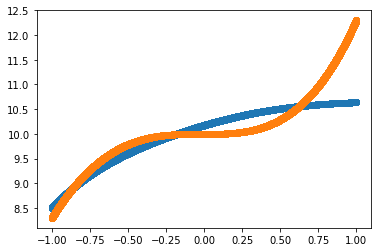

In [ ]:
dfc3 = shuffler('shuffle')
x_train3, y_train3, x_test3, y_test3, x_val3, y_val3 = trainvaltestsplit(dfc3['x'], dfc3['y'], 0.3, 0.2, 0.5)
c3 = model3Ltanh()
c3.fit(x_train3, y_train3, epochs = 20, batch_size = 12, validation_data = (x_val3, y_val3), shuffle=False)
predictioncase3 = c3.predict(np.array(x_test3))
plt.scatter(x_test3, predictioncase3)
plt.scatter(x_test3, y_test3)
errorscorecalc(y_test3, predictioncase3)

Epoch 1/20
215/215 [==============================] - 2s 5ms/step - loss: 0.0713 - mse: 0.0713 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2/20
215/215 [==============================] - 1s 5ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 3/20
215/215 [==============================] - 1s 4ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 4/20
215/215 [==============================] - 1s 5ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 5/20
215/215 [==============================] - 1s 3ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6/20
215/215 [==============================] - 1s 3ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 7/20
215/215 [==============================] - 1s 3ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 8/20
215/215 [==============================] - 1s 3ms/step - loss: 0.

(0.014686660727957547,
 0.0003427362729740456,
 0.01851313784786484,
 0.9905185314736837)

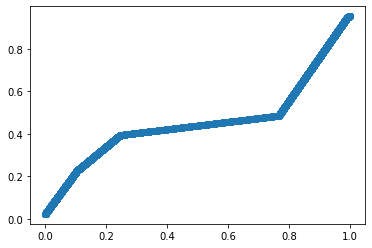

In [ ]:
dfc4us = shuffler('shuffle')
dfc4 = scaledata(dfc4us)
x_train4, y_train4, x_test4, y_test4, x_val4, y_val4 = trainvaltestsplit(dfc4['x'], dfc4['y'], 0.3, 0.2, 0.5)
c4 = model3Lrelu()                                                                        
c4.fit(x_train4, y_train4, epochs = 20, batch_size = 12, validation_data = (x_val4, y_val4), shuffle=False)
predictioncase4 = c4.predict(np.array(x_test4))
plt.scatter(x_test4, predictioncase4)
errorscorecalc(y_test4, predictioncase4)

Epoch 1/20
215/215 [==============================] - 2s 5ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2/20
215/215 [==============================] - 1s 5ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3/20
215/215 [==============================] - 1s 4ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 4/20
215/215 [==============================] - 1s 4ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 5/20
215/215 [==============================] - 1s 4ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 6/20
215/215 [==============================] - 1s 4ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 7/20
215/215 [==============================] - 1s 4ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 8/20
215/215 [==============================] - 1s 4ms/step - loss: 0.

(0.06611805788540911,
 0.006553322138310377,
 0.08095259191842086,
 0.819165652259828)

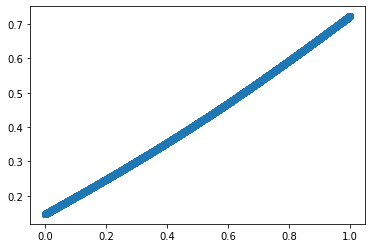

In [ ]:
dfc5us = shuffler('shuffle')
dfc5 = scaledata(dfc5us)
x_train5, y_train5, x_test5, y_test5, x_val5, y_val5 = trainvaltestsplit(dfc5['x'], dfc5['y'], 0.3, 0.2, 0.5)
c5 = model3Ltanh()                                                                        
c5.fit(x_train5, y_train5, epochs = 20, batch_size = 12, validation_data = (x_val5, y_val5), shuffle=False)
predictioncase5 = c5.predict(np.array(x_test5))
plt.scatter(x_test5, predictioncase5)
errorscorecalc(y_test5, predictioncase5)

Epoch 1/20
215/215 [==============================] - 2s 5ms/step - loss: 65.9924 - mse: 65.9924 - val_loss: 6.3863 - val_mse: 6.3863
Epoch 2/20
215/215 [==============================] - 1s 4ms/step - loss: 0.6041 - mse: 0.6041 - val_loss: 0.1706 - val_mse: 0.1706
Epoch 3/20
215/215 [==============================] - 1s 4ms/step - loss: 0.1433 - mse: 0.1433 - val_loss: 0.1244 - val_mse: 0.1244
Epoch 4/20
215/215 [==============================] - 1s 4ms/step - loss: 0.1056 - mse: 0.1056 - val_loss: 0.0926 - val_mse: 0.0926
Epoch 5/20
215/215 [==============================] - 1s 5ms/step - loss: 0.0783 - mse: 0.0783 - val_loss: 0.0681 - val_mse: 0.0681
Epoch 6/20
215/215 [==============================] - 1s 4ms/step - loss: 0.0566 - mse: 0.0566 - val_loss: 0.0481 - val_mse: 0.0481
Epoch 7/20
215/215 [==============================] - 1s 4ms/step - loss: 0.0389 - mse: 0.0389 - val_loss: 0.0320 - val_mse: 0.0320
Epoch 8/20
215/215 [==============================] - 1s 4ms/step - loss: 

(0.019953690129301288,
 0.0012226603569380828,
 0.03496656055344996,
 0.997869608470412)

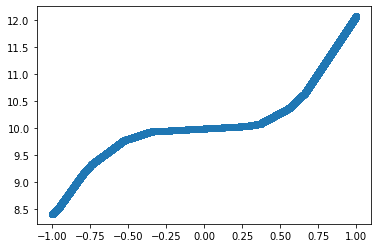

In [ ]:
dfc6 = shuffler('!shuffle')
x_train6, y_train6, x_test6, y_test6, x_val6, y_val6 = trainvaltestsplit(dfc6['x'], dfc6['y'], 0.3, 0.2, 0.5)
c6 = model3Lrelu()
c6.fit(x_train6, y_train6, epochs = 20, batch_size = 12, validation_data = (x_val6, y_val6), shuffle=False)
predictioncase6 = c6.predict(np.array(x_test6))
plt.scatter(x_test6, predictioncase6)
errorscorecalc(y_test6, predictioncase6)

Epoch 1/20
215/215 [==============================] - 1s 4ms/step - loss: 90.3771 - mse: 90.3771 - val_loss: 70.1730 - val_mse: 70.1730
Epoch 2/20
215/215 [==============================] - 1s 4ms/step - loss: 43.8512 - mse: 43.8512 - val_loss: 19.7570 - val_mse: 19.7570
Epoch 3/20
215/215 [==============================] - 1s 4ms/step - loss: 7.6672 - mse: 7.6672 - val_loss: 1.2823 - val_mse: 1.2823
Epoch 4/20
215/215 [==============================] - 1s 4ms/step - loss: 0.3691 - mse: 0.3691 - val_loss: 0.1029 - val_mse: 0.1029
Epoch 5/20
215/215 [==============================] - 1s 3ms/step - loss: 0.0862 - mse: 0.0862 - val_loss: 0.0862 - val_mse: 0.0862
Epoch 6/20
215/215 [==============================] - 1s 3ms/step - loss: 0.0812 - mse: 0.0812 - val_loss: 0.0828 - val_mse: 0.0828
Epoch 7/20
215/215 [==============================] - 1s 3ms/step - loss: 0.0778 - mse: 0.0778 - val_loss: 0.0790 - val_mse: 0.0790
Epoch 8/20
215/215 [==============================] - 1s 4ms/step - 

(0.1514896247259357,
 0.03537243434471441,
 0.18807560805355492,
 0.9383662567602954)

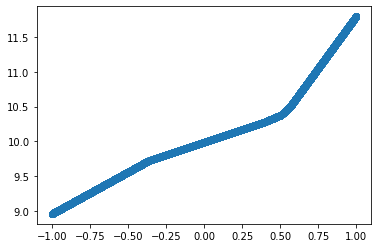

In [ ]:
dfc7 = shuffler('!shuffle')
x_train7, y_train7, x_test7, y_test7, x_val7, y_val7 = trainvaltestsplit(dfc7['x'], dfc7['y'], 0.3, 0.2, 0.5)
c7 = model1Lrelu()
c7.fit(x_train7, y_train7, epochs = 20, batch_size = 12, validation_data = (x_val7, y_val7), shuffle=False)
predictioncase7 = c7.predict(np.array(x_test7))
plt.scatter(x_test7, predictioncase7)
errorscorecalc(y_test7, predictioncase7)

Epoch 1/20
215/215 [==============================] - 2s 5ms/step - loss: 73.4663 - mse: 73.4663 - val_loss: 51.7598 - val_mse: 51.7598
Epoch 2/20
215/215 [==============================] - 1s 5ms/step - loss: 42.9367 - mse: 42.9367 - val_loss: 35.7627 - val_mse: 35.7627
Epoch 3/20
215/215 [==============================] - 1s 4ms/step - loss: 30.0538 - mse: 30.0538 - val_loss: 25.0982 - val_mse: 25.0982
Epoch 4/20
215/215 [==============================] - 1s 5ms/step - loss: 20.9165 - mse: 20.9165 - val_loss: 17.3039 - val_mse: 17.3039
Epoch 5/20
215/215 [==============================] - 1s 4ms/step - loss: 14.2376 - mse: 14.2376 - val_loss: 11.6324 - val_mse: 11.6324
Epoch 6/20
215/215 [==============================] - 1s 5ms/step - loss: 9.4301 - mse: 9.4301 - val_loss: 7.6048 - val_mse: 7.6048
Epoch 7/20
215/215 [==============================] - 1s 4ms/step - loss: 6.0715 - mse: 6.0715 - val_loss: 4.8437 - val_mse: 4.8437
Epoch 8/20
215/215 [==============================] - 1s

(0.31394047296923566,
 0.2452191546422899,
 0.4951960769657711,
 0.5727245044151531)

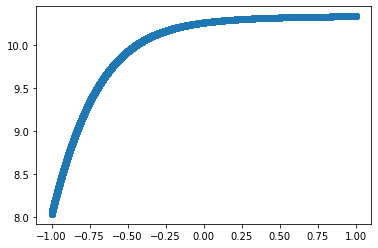

In [ ]:
dfc8 = shuffler('!shuffle')
x_train8, y_train8, x_test8, y_test8, x_val8, y_val8 = trainvaltestsplit(dfc8['x'], dfc8['y'], 0.3, 0.2, 0.5)
c8 = model3Ltanh()
c8.fit(x_train8, y_train8, epochs = 20, batch_size = 12, validation_data = (x_val8, y_val8), shuffle=False)
predictioncase8 = c8.predict(np.array(x_test8))
plt.scatter(x_test8, predictioncase8)
errorscorecalc(y_test8, predictioncase8)

Epoch 1/20
215/215 [==============================] - 1s 4ms/step - loss: 0.0710 - mse: 0.0710 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2/20
215/215 [==============================] - 1s 5ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 3/20
215/215 [==============================] - 1s 4ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 4/20
215/215 [==============================] - 1s 3ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 5/20
215/215 [==============================] - 1s 4ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 6/20
215/215 [==============================] - 1s 4ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 7/20
215/215 [==============================] - 1s 4ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 8/20
215/215 [==============================] - 1s 4ms/step - loss: 0.

(0.02323616046136061,
 0.0011061660206701874,
 0.03325907426057116,
 0.9691614541044854)

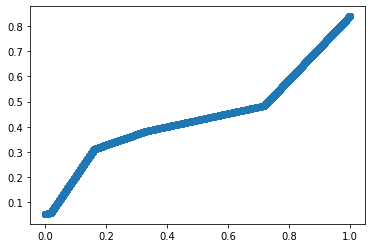

In [ ]:
dfc9us = shuffler('!shuffle')
dfc9 = scaledata(dfc9us)
x_train9, y_train9, x_test9, y_test9, x_val9, y_val9 = trainvaltestsplit(dfc9['x'], dfc9['y'], 0.3, 0.2, 0.5)
c9 = model3Lrelu()                                                                        
c9.fit(x_train9, y_train9, epochs = 20, batch_size = 12, validation_data = (x_val9, y_val9), shuffle=False)
predictioncase9 = c9.predict(np.array(x_test9))
plt.scatter(x_test9, predictioncase9)
errorscorecalc(y_test9, predictioncase9)

Epoch 1/20
215/215 [==============================] - 2s 5ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2/20
215/215 [==============================] - 1s 4ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3/20
215/215 [==============================] - 1s 5ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4/20
215/215 [==============================] - 1s 4ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 5/20
215/215 [==============================] - 1s 4ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 6/20
215/215 [==============================] - 1s 4ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 7/20
215/215 [==============================] - 1s 4ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 8/20
215/215 [==============================] - 1s 4ms/step - loss: 0.

(0.014049403703511609,
 0.0005063958417567791,
 0.0225032406945484,
 0.985882307795124)

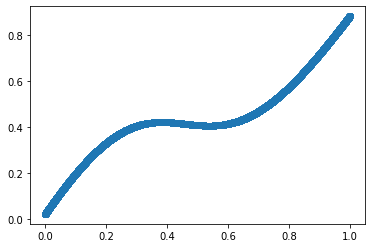

In [ ]:
dfc10us = shuffler('!shuffle')
dfc10 = scaledata(dfc10us)
x_train10, y_train10, x_test10, y_test10, x_val10, y_val10 = trainvaltestsplit(dfc10['x'], dfc10['y'], 0.3, 0.2, 0.5)
c10 = model3Ltanh()                                                                        
c10.fit(x_train10, y_train10, epochs = 20, batch_size = 12, validation_data = (x_val10, y_val10), shuffle=False)
predictioncase10 = c10.predict(np.array(x_test10))
plt.scatter(x_test10, predictioncase10)
errorscorecalc(y_test10, predictioncase10)